In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head()

,Id,main_id_locality,ETA,RTA,OrderedDate,latitude,del_latitude,longitude,del_longitude,EDA,...,ready_latitude,ready_longitude,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude,route,track
0,0,338,1249.0,1076.0,2020-03-11 20:43:49,45.013191,45.040428,38.981220,39.026501,7.0,...,45.012991,38.981120,45.012991,38.981120,45.040108,39.026086,45.040235,38.976080,stvqG{n|lFf@bCN|@NhBH~D?n@MvC_@rES`B??YFWCoAgE...,NaN
1,1,22402,1822.0,1812.0,2020-02-03 14:27:22,54.735378,54.710651,55.961922,55.822079,15.0,...,54.735327,55.961558,54.735515,55.962046,54.710222,55.822577,54.734853,55.957865,ooamI}`qtIXtE??h@_@|@^??lAaN??jA`@??XwD`@_E|@u...,m_qtI}namIWEQASCO?@B@@A@??????????EAKEBKHGDA??...
2,2,22394,410.0,336.0,2020-02-22 11:15:02,53.529202,53.543640,49.337990,49.351028,2.0,...,53.530384,49.339986,53.529227,49.338437,53.543038,49.350991,53.516670,49.416670,u}ueI_hclHwBkGaDqJo@oA]OiCuHK[M{@??Ag@Ie@UYSIU...,wlclHk}ueIGJVH????LJEJ\AtCJbBTHFVB?n@hC\`@iBiA...
3,3,22406,653.0,558.0,2020-02-26 22:21:28,56.836250,56.863159,60.632580,60.654831,4.0,...,56.836830,60.633442,56.836830,60.633442,56.862945,60.654256,56.838633,60.605489,qy{yIshaqJuADoAS_Bb@??UiE??wIfCgOrD}FhB_Bd@??m...,upaqJ{b|yI??^Dl@RFRCTFPNP?PIXGVAH????AA?????A@...
4,4,22406,518.0,463.0,2020-01-31 07:24:25,56.798431,56.782021,60.632622,60.681702,6.0,...,56.798378,60.632567,56.798399,60.632575,56.782251,60.682133,56.838633,60.605489,gmtyI{haqJ\f@??]pA]|@i@t@[Z_@X??c@gDcAoI??aEzB...,NaN


In [4]:
np.unique(df.main_id_locality)

array([  338, 22394, 22402, 22406])

In [5]:
city_dict = { 
    338: "Краснодар",
    22394: "Тольятти",
    22402: "Уфа",
    22406: "Екатеринбург"
}

In [20]:
city_coords = {
    "Краснодар": (45.035470, 38.975313)
}

In [6]:
df['city'] = df.main_id_locality.apply(lambda x: city_dict[x])

In [7]:
df.head()

,Id,main_id_locality,ETA,RTA,OrderedDate,latitude,del_latitude,longitude,del_longitude,EDA,...,ready_longitude,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude,route,track,city
0,0,338,1249.0,1076.0,2020-03-11 20:43:49,45.013191,45.040428,38.981220,39.026501,7.0,...,38.981120,45.012991,38.981120,45.040108,39.026086,45.040235,38.976080,stvqG{n|lFf@bCN|@NhBH~D?n@MvC_@rES`B??YFWCoAgE...,NaN,Краснодар
1,1,22402,1822.0,1812.0,2020-02-03 14:27:22,54.735378,54.710651,55.961922,55.822079,15.0,...,55.961558,54.735515,55.962046,54.710222,55.822577,54.734853,55.957865,ooamI}`qtIXtE??h@_@|@^??lAaN??jA`@??XwD`@_E|@u...,m_qtI}namIWEQASCO?@B@@A@??????????EAKEBKHGDA??...,Уфа
2,2,22394,410.0,336.0,2020-02-22 11:15:02,53.529202,53.543640,49.337990,49.351028,2.0,...,49.339986,53.529227,49.338437,53.543038,49.350991,53.516670,49.416670,u}ueI_hclHwBkGaDqJo@oA]OiCuHK[M{@??Ag@Ie@UYSIU...,wlclHk}ueIGJVH????LJEJ\AtCJbBTHFVB?n@hC\`@iBiA...,Тольятти
3,3,22406,653.0,558.0,2020-02-26 22:21:28,56.836250,56.863159,60.632580,60.654831,4.0,...,60.633442,56.836830,60.633442,56.862945,60.654256,56.838633,60.605489,qy{yIshaqJuADoAS_Bb@??UiE??wIfCgOrD}FhB_Bd@??m...,upaqJ{b|yI??^Dl@RFRCTFPNP?PIXGVAH????AA?????A@...,Екатеринбург
4,4,22406,518.0,463.0,2020-01-31 07:24:25,56.798431,56.782021,60.632622,60.681702,6.0,...,60.632567,56.798399,60.632575,56.782251,60.682133,56.838633,60.605489,gmtyI{haqJ\f@??]pA]|@i@t@[Z_@X??c@gDcAoI??aEzB...,NaN,Екатеринбург


In [8]:
df.groupby(by=['city']).mean()[['ETA', 'RTA']]

,ETA,RTA
city,,
Екатеринбург,1074.206074,981.944779
Краснодар,1079.602798,941.468390
Тольятти,797.363446,612.176717
Уфа,956.302418,807.959151


### Аналитика по городу

In [62]:
df['TIME_DIFF'] = df.ETA - df.RTA

In [63]:
city_name = "Краснодар"

In [64]:
df_ = df[(df.city == city_name)]

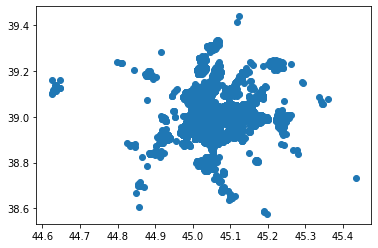

In [65]:
plt.scatter(df_['latitude'], df_['longitude'])

Расхожение по времени:

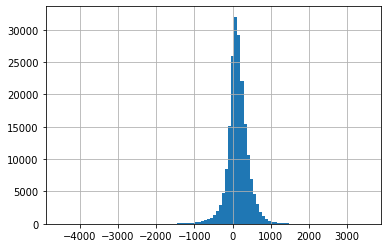

In [66]:
df_['TIME_DIFF'].hist(bins=100)

In [70]:
df_ = df[(df.city == city_name) & (df['TIME_DIFF'] < -500) & 
         (df['latitude'] > 44.9) & (df['latitude'] < 45.1) & 
         (df['longitude'] > 38.9) & (df['longitude'] < 39.1)]

In [71]:
df_.shape

(3755, 26)

In [72]:
df_.head()

,Id,main_id_locality,ETA,RTA,OrderedDate,latitude,del_latitude,longitude,del_longitude,EDA,...,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude,route,track,city,TIME_DIFF
195,195,338,2648.0,3739.0,2020-03-02 17:45:24,45.021801,45.069820,39.031288,39.014820,10.0,...,45.020961,39.028507,45.069658,39.014688,45.040235,38.97608,gixqGqhfmF_@]WI[NQVc@\Wj@Gr@DnAP^r@h@Ff@sAlL}B...,NaN,Краснодар,-1091.0
606,606,338,2372.0,3111.0,2020-02-04 17:22:55,45.014469,45.060341,38.984951,39.009930,10.0,...,45.015539,38.987921,45.060802,39.009745,45.040235,38.97608,m{vqG_g}lFYP??g@_CWgAwBsJeAgEaCmHgDqJwKoYQq@M}...,wr}lF_`wqGqB_@eBc@q@OIAB@CC[Iw@OmA_@y@SyAk@oAa...,Краснодар,-739.0
753,753,338,1374.0,2360.0,2020-03-11 06:42:10,44.998619,44.999889,38.983158,38.961529,11.0,...,NaN,NaN,NaN,NaN,45.040235,38.97608,}ysqG}~|lFk@iBo@aDiAcEa@iAI{@y@iD?e@fD{B??_BaH...,NaN,Краснодар,-986.0
1013,1013,338,3627.0,4346.0,2020-02-21 16:42:58,45.015331,45.054920,38.916870,39.003719,15.0,...,45.015317,38.917122,45.054871,39.003837,45.040235,38.97608,y`wqGo}olFjApB??rBwC??lBdD??vGwKrL_RnGcKdQsTvK...,o_plF{_wqG???????????????????A?E@ACA??DCJKLIJA...,Краснодар,-719.0
1205,1205,338,1055.0,1829.0,2020-02-26 16:53:14,45.054070,45.065262,38.985710,39.007881,3.0,...,45.056707,38.985316,45.064895,39.009016,45.040235,38.97608,mr~qG}k}lFCY??yF@q@H}Cr@qFxAw@N[DkF\??K}AWeC??...,uh}lFqe_rG@???A@@A?????????E@G@E@E?A@A?A??????...,Краснодар,-774.0


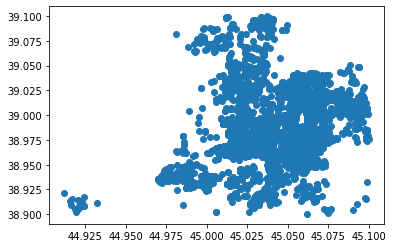

In [73]:
plt.scatter(df_['latitude'], df_['longitude'])

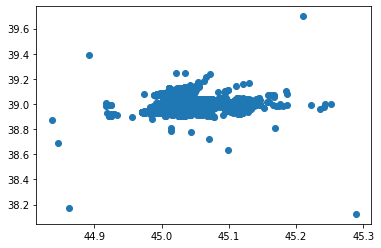

In [74]:
plt.scatter(df_['del_latitude'], df_['del_longitude'])

In [18]:
# !pip install folium

In [75]:
import folium

In [85]:
city_map = folium.Map(
                location=city_coords[city_name],
                zoom_start=10
            )

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

num_trips = 6
for i, (lat_start, lng_start, lat_end, lng_end) in enumerate(zip(df_['latitude'][:num_trips], df_['longitude'][:num_trips], 
                                                  df_['del_latitude'][:num_trips], df_['del_longitude'][:num_trips])):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat_start, lng_start],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup='route: {}, start: lat: {}, long: {}'.format(i, lat, lng)
        )
    ).add_to(city_map)
    
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat_end, lng_end],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup='route: {}, finish: lat: {}, long: {}'.format(i, lat, lng)
        )
    ).add_to(city_map)

city_map

In [61]:
df_.head(1)

,Id,main_id_locality,ETA,RTA,OrderedDate,latitude,del_latitude,longitude,del_longitude,EDA,...,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude,route,track,city,TIME_DIFF
28,28,338,2413.0,1392.0,2020-03-12 10:10:31,45.060162,45.025089,38.916481,38.95916,9.0,...,45.060378,38.916168,45.025165,38.959393,45.040235,38.97608,_y_rGa{olFlBhB??V}@??b]z[h@j@JR??VbAP~@??t@NF?...,NaN,Краснодар,1021.0
